# Fish Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[-1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

Dosyaları okuyarak dataframe haline getiriyoruz.

In [3]:
df.head()

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


Veri setimizin ilk 5 satırını gözlemledik.Resimlerin dosya yollarının yer aldığı path ve balık sınıflarının bulunduğu label sütunlarından oluşmakta.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [5]:
df.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

Balık sınıflarının kaç örnekten oluştuğunu gözlemledik.

In [6]:
df.label.unique()


array(['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet',
       'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream',
       'Red Sea Bream'], dtype=object)

Balık sınıflarının isimleri. Toplam 9 adet balık sınıfı bulunmakta.

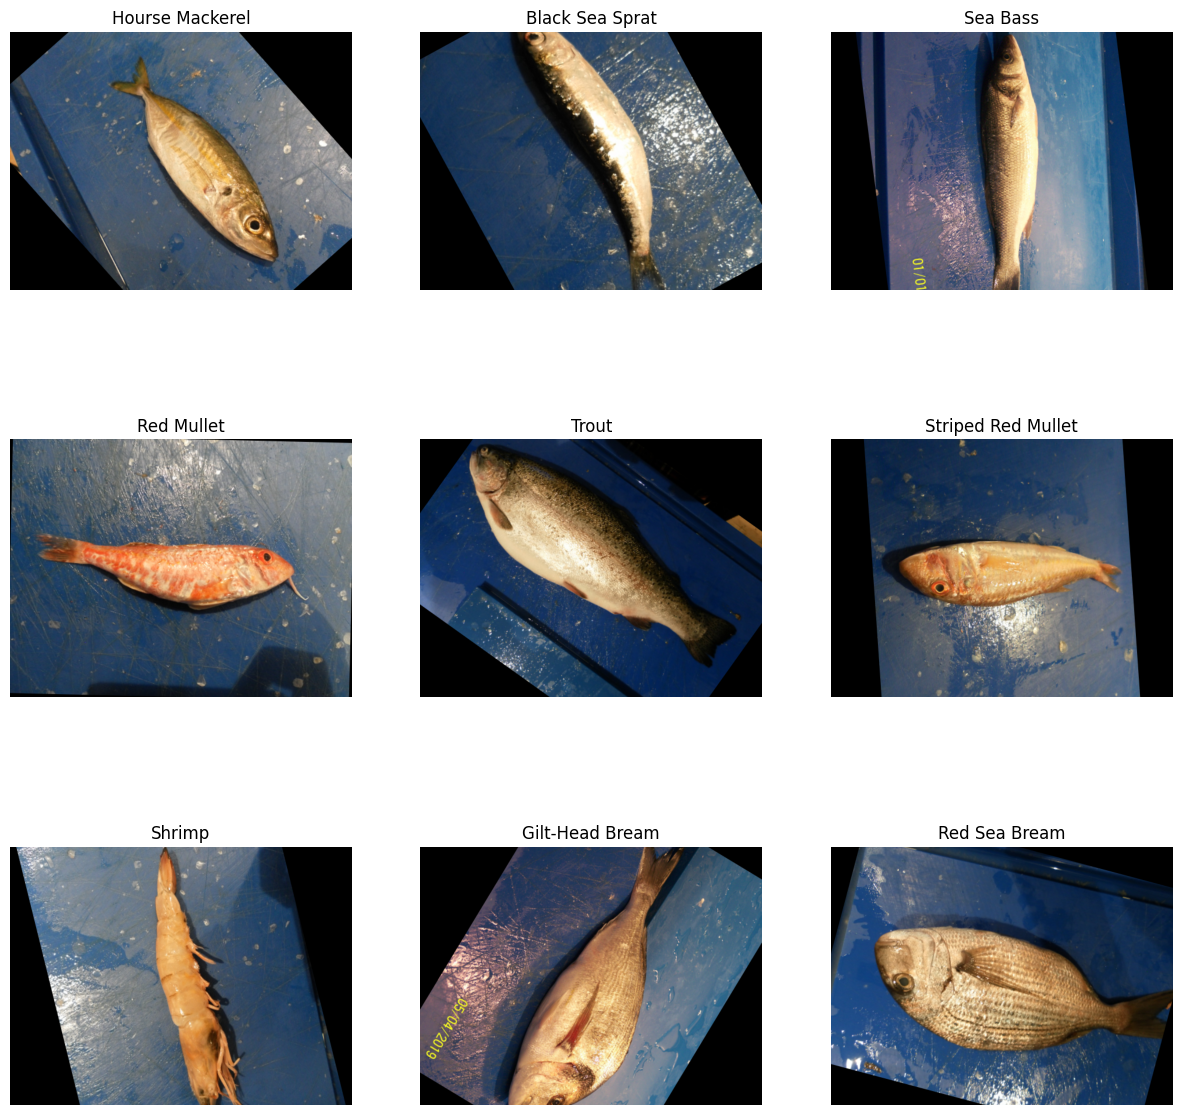

In [7]:
i=1
fig = plt.figure(figsize=(15,15))
for unique_label in df.label.unique():
    plt.subplot(3,3,i)
    plt.imshow(plt.imread(df[df.label == unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis("off")
    i+=1


Her balık sınıfından 1 resmi gözlemledik.

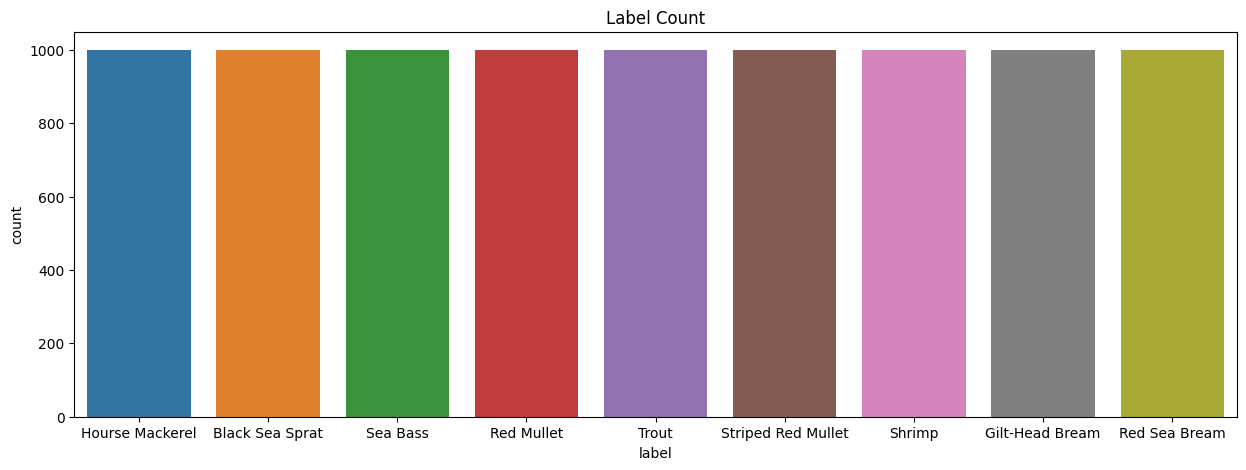

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x= "label",data= df)
plt.title("Label Count")
plt.show()

Balık türlerini grafiğe dökerek dengeli bir dağılım olduğunu gözlemledik.

In [9]:
def load_image(path):
    img = load_img(path, target_size=(224, 224)) 
    image_array = img_to_array(img)
    image_array /= 255.0
    return image_array

image_paths = df['path'].values
labels = df['label'].values
images = np.array([load_image(img_path) for img_path in image_paths])
images.shape

(9000, 224, 224, 3)

Resimlerin boyutlarını (224,224) olacak şekilde ayarladık.Daha sonra bu resimlerin piksel değerlerini normalize ederek 0 ve 1 arasına getirdik ve numpy arrayine dönüştürerek kaydettik.

In [10]:
images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

Burada bir önceki işlemimizin sonuçlarını görüyoruz.

In [11]:
labels = pd.get_dummies(df['label']).astype(int).values
labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Label'larımıza one hot encoding uygulayarak 0 ve 1 değerlerine getirdik.

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Eğitim verisi:",X_train.shape[0])
print("Doğrulama verisi:",X_val.shape[0])
print("Test verisi:",X_test.shape[0])

Eğitim verisi: 7200
Doğrulama verisi: 900
Test verisi: 900


Eğitim, doğrulama ve test verilerimizi ayırdık.

In [13]:
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),   
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),       
    Dense(9, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Bu adımda ara katman ve çıkış katmanlarımızı oluştuyoruz ve 3 boyutlu görüntü verisini tek bir vektöre düzleştiriyoruz.Modelimizi derliyoruz ve erken durdurma mekanizması ekliyoruz.

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=50,                     
    validation_data=(X_val, y_val), 
    batch_size=32, 
    callbacks=[early_stopping]    
)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:",test_acc)
print("Test loss:",test_loss)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 211ms/step - accuracy: 0.3081 - loss: 13.9779 - val_accuracy: 0.4856 - val_loss: 2.0241
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 199ms/step - accuracy: 0.5993 - loss: 1.5046 - val_accuracy: 0.6167 - val_loss: 1.3596
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.7338 - loss: 0.8735 - val_accuracy: 0.7289 - val_loss: 0.7513
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 197ms/step - accuracy: 0.7567 - loss: 0.8219 - val_accuracy: 0.7689 - val_loss: 0.7371
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.8409 - loss: 0.4639 - val_accuracy: 0.8000 - val_loss: 0.6140
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 198ms/step - accuracy: 0.8552 - loss: 0.4500 - val_accuracy: 0.8311 - val_loss: 0.4987
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.8979 - loss: 0.2982 - val_accuracy: 0.8433 - val_loss: 0.5236
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 49s 218ms/step - accuracy: 0.8916 - loss: 

Modelimizi fit ederek test accuracy ve test loss sonuçlarımızı gözlemliyoruz.

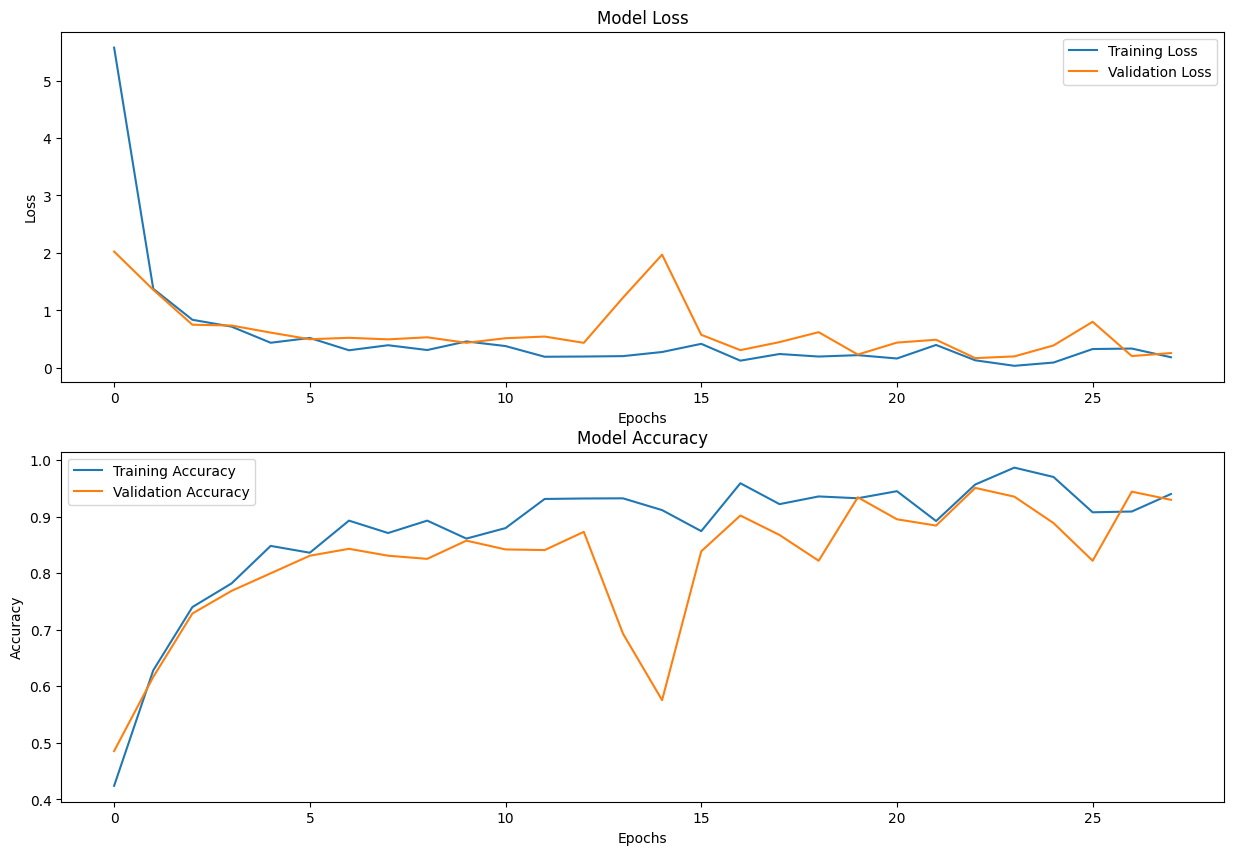

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Loss ve Accuracy grafiklerimizi çizdiriyoruz.